In [ ]:
# from tensorflow.compat.v1 import ConfigProto
# from tensorflow.compat.v1 import InteractiveSession

# config = ConfigProto()
# config.gpu_options.per_process_gpu_memory_fraction = 0.5
# config.gpu_options.allow_growth = True
# session = InteractiveSession(config=config)

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import Sequential       

In [ ]:
!unzip /content/drive/MyDrive/leaf/tomato_leaf.zip -d /content/drive/MyDrive/leaf/

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/leaf/tomato/train/Tomato___Target_Spot/0044d10f-7062-4655-8abd-9fffc5b2f152___Com.G_TgS_FL 7908.JPG  
  inflating: /content/drive/MyDrive/leaf/tomato/train/Tomato___Target_Spot/00854623-ba28-446d-a1d5-03c0ae3f99d9___Com.G_TgS_FL 7949.JPG  
  inflating: /content/drive/MyDrive/leaf/tomato/train/Tomato___Target_Spot/0118c27a-f34a-41e1-8b2f-d2c564f83c5c___Com.G_TgS_FL 0013.JPG  
  inflating: /content/drive/MyDrive/leaf/tomato/train/Tomato___Target_Spot/0118ed61-b135-45be-ad81-7e2d54203be4___Com.G_TgS_FL 8241.JPG  
  inflating: /content/drive/MyDrive/leaf/tomato/train/Tomato___Target_Spot/0197df47-a9cb-4b6c-b72c-ac0e9af6d135___Com.G_TgS_FL 0779.JPG  
  inflating: /content/drive/MyDrive/leaf/tomato/train/Tomato___Target_Spot/025510ac-15db-4861-b02b-21da82161100___Com.G_TgS_FL 0952.JPG  
  inflating: /content/drive/MyDrive/leaf/tomato/train/Tomato___Target_Spot/0288164e-d6cf-4215-b593-7b581308a4cf___Com.G_T

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
train_dir = '/content/drive/MyDrive/leaf/tomato/train'
val_dir = '/content/drive/MyDrive/leaf/tomato/val'

In [ ]:
import glob
tr_folder = glob.glob('/content/drive/MyDrive/leaf/tomato/train/**')
val_folder = glob.glob('/content/drive/MyDrive/leaf/tomato/val/**')

In [ ]:
tr_folder

['/content/drive/MyDrive/leaf/tomato/train/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/leaf/tomato/train/Tomato___Early_blight',
 '/content/drive/MyDrive/leaf/tomato/train/Tomato___Late_blight',
 '/content/drive/MyDrive/leaf/tomato/train/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/leaf/tomato/train/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/leaf/tomato/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/leaf/tomato/train/Tomato___Target_Spot',
 '/content/drive/MyDrive/leaf/tomato/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/leaf/tomato/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/leaf/tomato/train/Tomato___healthy']

In [ ]:
val_folder

['/content/drive/MyDrive/leaf/tomato/val/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/leaf/tomato/val/Tomato___Early_blight',
 '/content/drive/MyDrive/leaf/tomato/val/Tomato___Late_blight',
 '/content/drive/MyDrive/leaf/tomato/val/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/leaf/tomato/val/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/leaf/tomato/val/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/leaf/tomato/val/Tomato___Target_Spot',
 '/content/drive/MyDrive/leaf/tomato/val/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/leaf/tomato/val/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/leaf/tomato/val/Tomato___healthy']

In [ ]:
import os
path = os.path.join(train_dir)
for dir in  os.listdir(path):
  print(dir)

Tomato___Bacterial_spot
Tomato___Early_blight
Tomato___Late_blight
Tomato___Leaf_Mold
Tomato___Septoria_leaf_spot
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Target_Spot
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Tomato_mosaic_virus
Tomato___healthy


In [ ]:
# !pip install split_folders

In [ ]:
# import splitfolders
# splitfolders.ratio('/content/drive/MyDrive/leaf/tomato/tomato/val', output='data', seed=1337, ratio=(0.8, 0.2))

Copying files: 1000 files [00:16, 61.05 files/s]


In [ ]:
# def files_count(base_dir):
#   path = os.walk(base_dir, topdown=True)

#   for root, directories, files in path:
#     total = 0
#     for directory in directories:
#       full_path = os.path.join(base_dir, directory)
#       # print full path
#       ln =len(os.listdir(full_path))
#       print(full_path, ln)
#       total +=ln
#     print('total', root, total)

# files_count('/content/drive/MyDrive/leaf/tomato/tomato/val')
# files_count('data/val')
# files_count('data/test')

## Creating generator

In [ ]:
# generator working
# take batch of images, convert into tensor, array, auto,
# This generator is use for read imgs from file and then give to the AL-Algorithm
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
  )

test_datagen = ImageDataGenerator(1./255)

In [ ]:
batch_size = 20

In [ ]:
train_set = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 10000 images belonging to 10 classes.


In [ ]:
val_set = test_datagen.flow_from_directory(
    val_dir,
    target_size = (224, 224),
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 1000 images belonging to 10 classes.


## now built convnets 

In [ ]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 128)      

In [ ]:
model.compile(optimizer ='adam',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

In [ ]:
steps_per_ep = 10000 // batch_size
val_st = 1000 // batch_size

In [ ]:
steps_per_ep, val_st

(500, 50)

In [ ]:
history = model.fit(train_set,
                    steps_per_epoch=steps_per_ep,
                    epochs=30,
                    validation_data=val_set,
                    validation_steps=val_st,
                    verbose = 1)

Epoch 1/30
500/500 [==============================] - ETA: 0s - loss: 1.8197 - acc: 0.3245

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


500/500 [==============================] - 162s 322ms/step - loss: 1.8197 - acc: 0.3245 - val_loss: 1472.9142 - val_acc: 0.1270
Epoch 2/30
500/500 [==============================] - 158s 317ms/step - loss: 1.2383 - acc: 0.5539 - val_loss: 843.0678 - val_acc: 0.2190
Epoch 3/30
500/500 [==============================] - 159s 318ms/step - loss: 0.9847 - acc: 0.6458 - val_loss: 1020.0005 - val_acc: 0.1900
Epoch 4/30
500/500 [==============================] - 162s 323ms/step - loss: 0.8379 - acc: 0.7043 - val_loss: 1026.7107 - val_acc: 0.2350
Epoch 5/30
500/500 [==============================] - 158s 315ms/step - loss: 0.7094 - acc: 0.7470 - val_loss: 1547.6312 - val_acc: 0.2730
Epoch 6/30
500/500 [==============================] - 156s 311ms/step - loss: 0.6170 - acc: 0.7844 - val_loss: 2236.5557 - val_acc: 0.1400
Epoch 7/30
500/500 [==============================] - 157s 314ms/step - loss: 0.5291 - acc: 0.8133 - val_loss: 3031.5564 - val_acc: 0.1410
Epoch 8/30
500/500 [===================

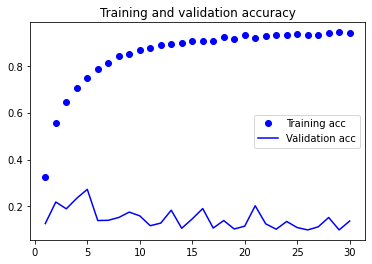

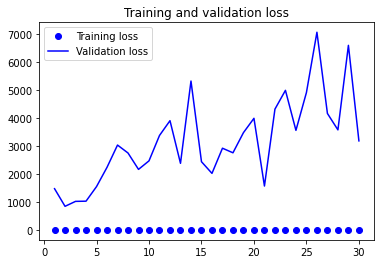

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Now we use pre_trained keras model

In [ ]:
# from tensorflow.keras.applications import VGG16

conv = VGG16(weights='imagenet', include_top=False, input_shape = (IMAGE_SIZE + [3]))

In [ ]:
# conv.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# modal = models.Sequential()
# modal.add(conv)
# modal.add(layers.Flatten())
# modal.add(layers.Dense(512, activation='relu'))
# modal.add(layers.Dense(10, activation='softmax'))
# modal.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               12845568  
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 27,565,386
Trainable params: 27,565,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# # now we want to freez weights
# print('this is freezing weights:', len(model.trainable_weights))

# conv.trainable = False

# print('this is after freezing weights:', len(model.trainable_weights))

In [ ]:
# conv.trainable = True
# set_trainable = False

# for layer in conv.layers:
#   if layer.name == 'block5_conv1':
#     set_trainable = True
#   if set_trainable:
#     layer.trainable == True
#   else:
#     layer.trainable == False  

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (224, 224),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

Found 10000 images belonging to 10 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(val_dir,
                                            target_size = (224, 224),
                                            batch_size = batch_size,
                                            class_mode = 'categorical')

Found 1000 images belonging to 10 classes.


In [ ]:
# opt = tf.keras.optimizers.RMSprop(epsilon=1e-5)

# modal.compile(optimizer=opt,
#               loss='categorical_crossentropy',
#               metrics=['acc'])


In [ ]:
# history = modal.fit(training_set,
#                     steps_per_epoch=steps_per_ep,
#                     epochs=10,
#                     validation_data=test_set,
#                     validation_steps=val_st,
#                     verbose=1
#                     )

Epoch 1/10
500/500 [==============================] - 327s 624ms/step - loss: 359.3122 - acc: 0.0932 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/10
500/500 [==============================] - 312s 623ms/step - loss: 2.3029 - acc: 0.0885 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 3/10
282/500 [===============>..............] - ETA: 2:11 - loss: 2.3028 - acc: 0.0970

KeyboardInterrupt: ignored

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Now i am using InceptionV3

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE) + [3])

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in inception.layers:
  layer.trainable = False

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Lambda, Flatten, Dense
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = layers.Dense(10, activation='softmax')(x)

# create a model object
model = Model(inputs = inception.input, outputs = prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d_15[0][0]                  
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(training_set,
                 steps_per_epoch=steps_per_ep,
                 epochs=10,
                 validation_data=test_set,
                 validation_steps=val_st,
                 verbose=1)

Epoch 1/10
500/500 [==============================] - 193s 328ms/step - loss: 3.9448 - accuracy: 0.6373 - val_loss: 4.3581 - val_accuracy: 0.6580
Epoch 2/10
500/500 [==============================] - 161s 322ms/step - loss: 2.9586 - accuracy: 0.7627 - val_loss: 3.5517 - val_accuracy: 0.7450
Epoch 3/10
500/500 [==============================] - 161s 322ms/step - loss: 2.7697 - accuracy: 0.7939 - val_loss: 4.7111 - val_accuracy: 0.7160
Epoch 4/10
500/500 [==============================] - 160s 320ms/step - loss: 2.2733 - accuracy: 0.8332 - val_loss: 4.0851 - val_accuracy: 0.7670
Epoch 5/10
500/500 [==============================] - 159s 319ms/step - loss: 2.4323 - accuracy: 0.8376 - val_loss: 7.4534 - val_accuracy: 0.6940
Epoch 6/10
500/500 [==============================] - 160s 319ms/step - loss: 2.2499 - accuracy: 0.8505 - val_loss: 4.0909 - val_accuracy: 0.7960
Epoch 7/10
500/500 [==============================] - 161s 321ms/step - loss: 2.3093 - accuracy: 0.8562 - val_loss: 3.6802 -

In [ ]:
model.save('leaf_Inception_v3.h5')
!cp leaf_Inception_v3.h5 'drive/MyDrive/leaf/' 

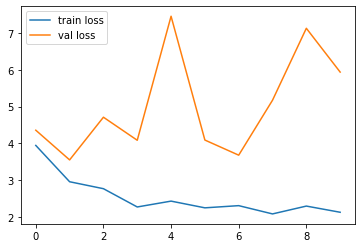

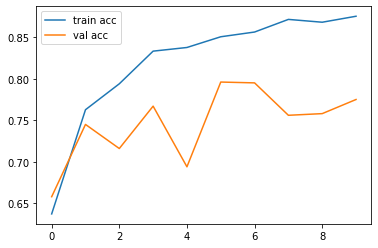

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
y_pred = model.predict(test_set)
y_pred

array([[3.8461339e-22, 9.9999940e-01, 3.8624109e-14, ..., 0.0000000e+00,
        0.0000000e+00, 4.2883751e-25],
       [0.0000000e+00, 3.9789142e-36, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 3.9869292e-17, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 6.2876167e-28, 5.1698760e-38, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [2.3990089e-33, 0.0000000e+00, 1.9813107e-36, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [ ]:
y_arg_pred = np.argmax(y_pred, axis=1)
y_arg_pred

array([1, 2, 0, 5, 5, 5, 2, 3, 0, 5, 6, 9, 9, 9, 0, 2, 0, 2, 8, 5, 2, 5,
       0, 6, 1, 5, 7, 2, 3, 0, 9, 4, 9, 2, 2, 5, 7, 2, 0, 7, 9, 7, 0, 7,
       4, 9, 4, 3, 0, 9, 2, 3, 0, 1, 1, 6, 6, 3, 6, 6, 2, 2, 9, 2, 8, 3,
       2, 5, 5, 8, 0, 2, 1, 3, 3, 2, 7, 2, 4, 2, 9, 9, 0, 4, 4, 4, 0, 1,
       2, 2, 9, 7, 5, 8, 2, 4, 6, 1, 4, 3, 3, 5, 2, 7, 9, 2, 2, 0, 2, 2,
       9, 2, 8, 9, 2, 2, 8, 3, 0, 2, 2, 9, 5, 2, 4, 3, 7, 0, 8, 2, 8, 3,
       7, 5, 8, 2, 3, 7, 3, 2, 7, 6, 0, 9, 0, 2, 0, 2, 7, 0, 9, 1, 5, 7,
       5, 9, 2, 5, 5, 9, 1, 9, 8, 7, 5, 4, 0, 1, 2, 5, 7, 8, 2, 0, 0, 1,
       4, 2, 2, 7, 5, 7, 7, 3, 5, 2, 6, 0, 0, 4, 3, 2, 3, 2, 5, 9, 3, 5,
       4, 2, 2, 3, 0, 9, 3, 5, 3, 4, 0, 2, 9, 2, 4, 9, 9, 5, 7, 5, 6, 5,
       2, 4, 0, 6, 2, 6, 3, 7, 4, 8, 2, 3, 9, 0, 0, 2, 5, 2, 3, 7, 7, 8,
       9, 4, 1, 6, 9, 0, 5, 0, 3, 6, 5, 4, 8, 1, 2, 6, 8, 5, 3, 5, 4, 9,
       3, 1, 7, 9, 2, 9, 3, 8, 3, 4, 3, 9, 2, 3, 4, 5, 4, 1, 7, 2, 0, 2,
       3, 0, 2, 2, 9, 2, 5, 6, 5, 2, 8, 2, 7, 7, 3,

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
# if we need this so we load_model in this way
# model_11 = load_model('/content/drive/MyDrive/leaf/leaf_Inception_v3.h5')

In [ ]:
img = load_img('/content/drive/MyDrive/leaf/new_image/Septoria leaf spot.jpg', target_size=(224, 224))

In [ ]:
x1 = img_to_array(img)
x1

array([[[146., 176., 168.],
        [160., 189., 185.],
        [170., 192., 190.],
        ...,
        [ 99., 116.,  74.],
        [ 97., 104.,  63.],
        [ 91., 105.,  54.]],

       [[152., 181., 176.],
        [164., 189., 185.],
        [168., 190., 188.],
        ...,
        [ 92., 116.,  66.],
        [ 93., 112.,  57.],
        [ 88., 106.,  54.]],

       [[155., 184., 179.],
        [166., 187., 188.],
        [163., 188., 184.],
        ...,
        [ 91., 114.,  68.],
        [ 88., 103.,  62.],
        [ 97., 110.,  54.]],

       ...,

       [[ 92., 129.,  88.],
        [ 92., 130.,  91.],
        [ 91., 125.,  92.],
        ...,
        [219., 213., 213.],
        [216., 210., 210.],
        [210., 204., 204.]],

       [[103., 136.,  89.],
        [ 97., 132.,  90.],
        [ 99., 131.,  81.],
        ...,
        [218., 214., 213.],
        [215., 209., 209.],
        [211., 205., 205.]],

       [[106., 140.,  79.],
        [112., 137.,  72.],
        [105., 1

In [ ]:
x1 = x1/255

In [ ]:
x1.shape

(224, 224, 3)

In [ ]:
x1 = np.expand_dims(x1, axis=0)
img_data1 = preprocess_input(x1)
img_data1

array([[[[-0.99550945, -0.9945867 , -0.99483275],
         [-0.9950788 , -0.9941869 , -0.9943099 ],
         [-0.99477124, -0.99409455, -0.9941561 ],
         ...,
         [-0.99695504, -0.9964321 , -0.99772394],
         [-0.99701655, -0.99680126, -0.9980623 ],
         [-0.9972011 , -0.9967705 , -0.9983391 ]],

        [[-0.99532485, -0.9944329 , -0.9945867 ],
         [-0.9949558 , -0.9941869 , -0.9943099 ],
         [-0.99483275, -0.9941561 , -0.99421763],
         ...,
         [-0.9971703 , -0.9964321 , -0.99797   ],
         [-0.9971396 , -0.99655515, -0.99824685],
         [-0.99729335, -0.99673975, -0.9983391 ]],

        [[-0.9952326 , -0.99434066, -0.99449444],
         [-0.99489427, -0.9942484 , -0.99421763],
         [-0.99498653, -0.99421763, -0.99434066],
         ...,
         [-0.9972011 , -0.99649364, -0.9979085 ],
         [-0.99729335, -0.996832  , -0.99809307],
         [-0.99701655, -0.99661666, -0.9983391 ]],

        ...,

        [[-0.9971703 , -0.9960323 , -0

In [ ]:
img_data1.shape

(1, 224, 224, 3)

In [ ]:
new_pred = model.predict(img_data1)

In [ ]:
new_pred

array([[2.2689423e-21, 4.3180508e-09, 1.0000000e+00, 8.7969963e-18,
        1.0536792e-15, 1.7787356e-19, 5.5358222e-20, 7.6918915e-19,
        3.4425155e-22, 4.9999286e-17]], dtype=float32)

In [ ]:
a=np.argmax(new_pred, axis=1)
a

array([2])

In [ ]:
a==2

array([ True])

In [ ]:
img = load_img('/content/drive/MyDrive/leaf/new_image/figure-1-6.jpg', target_size=(224, 224))

In [ ]:
x2 = img_to_array(img)
x2

array([[[ 61.,  93.,  30.],
        [ 98., 126.,  78.],
        [ 81., 105.,  69.],
        ...,
        [ 17.,  19.,   6.],
        [ 18.,  16.,   4.],
        [ 13.,  17.,   3.]],

       [[ 76., 101.,  44.],
        [ 96., 117.,  78.],
        [ 66.,  88.,  42.],
        ...,
        [ 25.,  27.,  16.],
        [ 15.,  15.,   3.],
        [ 12.,  15.,   4.]],

       [[ 75., 104.,  48.],
        [ 67.,  94.,  49.],
        [ 62.,  76.,  43.],
        ...,
        [ 39.,  36.,  17.],
        [ 14.,  16.,   5.],
        [ 14.,  14.,   2.]],

       ...,

       [[ 43.,  59.,  20.],
        [ 40.,  50.,  16.],
        [ 50.,  60.,  26.],
        ...,
        [ 29.,  38.,   7.],
        [ 24.,  40.,  11.],
        [ 28.,  42.,   7.]],

       [[ 43.,  51.,  10.],
        [ 42.,  46.,  19.],
        [ 51.,  53.,  31.],
        ...,
        [ 27.,  43.,   6.],
        [ 27.,  41.,   5.],
        [ 27.,  43.,   7.]],

       [[ 43.,  53.,  26.],
        [ 44.,  44.,  18.],
        [ 49.,  

In [ ]:
x2.shape

(224, 224, 3)

In [ ]:
x2 = x2/255

In [ ]:
x2 = np.expand_dims(x2, axis=0)
img_data2 = preprocess_input(x2)
img_data2


array([[[[-0.9981238 , -0.9971396 , -0.99907726],
         [-0.9969858 , -0.99612457, -0.9976009 ],
         [-0.99750865, -0.9967705 , -0.9978777 ],
         ...,
         [-0.99947715, -0.99941564, -0.99981546],
         [-0.9994464 , -0.9995079 , -0.999877  ],
         [-0.9996002 , -0.99947715, -0.99990773]],

        [[-0.9976624 , -0.9968935 , -0.9986467 ],
         [-0.9970473 , -0.99640137, -0.9976009 ],
         [-0.99797   , -0.99729335, -0.9987082 ],
         ...,
         [-0.99923104, -0.9991695 , -0.9995079 ],
         [-0.99953866, -0.99953866, -0.99990773],
         [-0.9996309 , -0.99953866, -0.999877  ]],

        [[-0.9976932 , -0.99680126, -0.99852365],
         [-0.9979392 , -0.9971088 , -0.9984929 ],
         [-0.99809307, -0.9976624 , -0.99867743],
         ...,
         [-0.99880046, -0.9988927 , -0.99947715],
         [-0.9995694 , -0.9995079 , -0.9998462 ],
         [-0.9995694 , -0.9995694 , -0.9999385 ]],

        ...,

        [[-0.99867743, -0.99818534, -0

In [ ]:
img_data2.shape

(1, 224, 224, 3)

In [ ]:
b = model.predict(img_data2)
b

array([[8.3721561e-20, 1.4712801e-04, 9.9985290e-01, 4.3783133e-11,
        2.0462465e-11, 1.4926379e-15, 7.3593723e-20, 4.6087518e-20,
        5.0774395e-15, 6.6476595e-17]], dtype=float32)

In [ ]:
# b = np.argmax(b, axis=1)
# b

In [ ]:

img=load_img('/content/drive/MyDrive/leaf/new_image/image.jpg',target_size=(224,224))


x4=img_to_array(img)
x4 = x4/255

x4=np.expand_dims(x4,axis=0)
img_data4=preprocess_input(x4)
img_data4.shape

(1, 224, 224, 3)

In [ ]:
c = model.predict(img_data4)
c

array([[1.4110435e-22, 5.6838104e-07, 9.9999940e-01, 4.1998549e-12,
        3.3093919e-13, 1.2189666e-18, 3.1731461e-15, 1.0493804e-19,
        5.6634043e-19, 6.8877630e-18]], dtype=float32)

In [ ]:
# c=np.argmax(c, axis=1)
# c